In [2]:
import mlflow

In [3]:
experiment_name = "breast_cancer"
mlflow.set_experiment(experiment_name)

2025/01/30 16:41:23 INFO mlflow.tracking.fluent: Experiment with name 'breast_cancer' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/troywissenbach/Documents/spring_25_classes/ml_ops/mlflow_exploration/mlruns/561028487634178582', creation_time=1738280483561, experiment_id='561028487634178582', last_update_time=1738280483561, lifecycle_stage='active', name='breast_cancer', tags={}>

In [4]:
mlflow.set_tracking_uri('mlruns')

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile

In [7]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
active_run = mlflow.start_run()

In [11]:
active_run.info.run_id

'f9ed8687f2444bb5bbd89d505a519082'

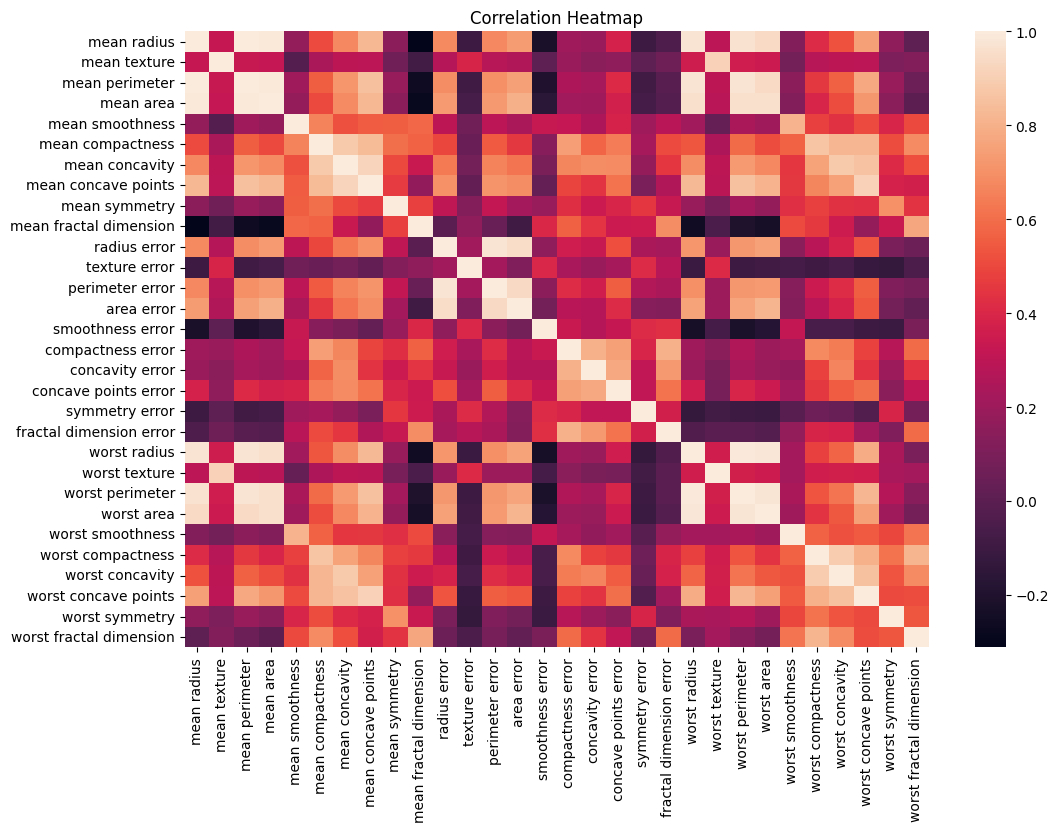

In [20]:
plt.figure(figsize=(12, 8))
corr = df.corr()

sns.heatmap(corr)
plt.title('Correlation Heatmap')

save_path = 'heatmap.png'

plt.savefig(save_path)
mlflow.log_artifact(save_path, 'figures')

In [13]:
mlflow.log_artifact()

TypeError: log_artifact() missing 1 required positional argument: 'local_path'

In [14]:
df.describe().to_csv('describe.csv', index=False)

mlflow.log_artifact('describe.csv','eda')

In [26]:
# experiment id is the first set of numbers in mlflow url after the word "experiments"
experiment_id = '561028487634178582'

In [24]:
mlflow.last_active_run()

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'receptive-fawn-49',
 'mlflow.source.name': '/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'troywissenbach'}>, info=<RunInfo: artifact_uri='file:///Users/troywissenbach/Documents/spring_25_classes/ml_ops/mlflow_exploration/mlruns/561028487634178582/f9ed8687f2444bb5bbd89d505a519082/artifacts', end_time=1738281427857, experiment_id='561028487634178582', lifecycle_stage='active', run_id='f9ed8687f2444bb5bbd89d505a519082', run_name='receptive-fawn-49', run_uuid='f9ed8687f2444bb5bbd89d505a519082', start_time=1738280767927, status='FINISHED', user_id='troywissenbach'>, inputs=<RunInputs: dataset_inputs=[]>>

In [28]:
random_state = 1234

In [21]:
mlflow.end_run()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.5, random_state=random_state)

In [32]:
def create_dataset(X, y, name):

    this_run =mlflow.active_run()

    train = X.copy()
    train['label'] = y
    
    with tempfile.TemporaryDirectory() as temp_dir:
        train.to_csv(
            temp_dir + f'/{name}.csv'
            , index=False # Call this out
        )
        
        mlflow.log_artifact(
            temp_dir + f'/{name}.csv'
        )
        
        dataset_train: mlflow.data.pandas_dataset.PandasDataset = mlflow.data.from_pandas(train, source=this_run.info.artifact_uri + f'/{name}.csv', name='training') # Call out this odd pathing

    mlflow.log_input(
        dataset_train
        , context=f'{name}'
    )

In [46]:
with mlflow.start_run():

    create_dataset(X_train, y_train, 'training')
    create_dataset(X_test, y_test, 'testing')


    model = RandomForestClassifier(n_estimators=100, random_state=123)
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, 
                             "model2",
                             extra_pip_requirements=['seaborn'])

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'file:///Users/troywissenbach/Documents/spring_25_classes/ml_ops/mlflow_exploration/mlruns/561028487634178582/49b453da83f24b1db4dd621d6a01a9b4/artifacts/training.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contai

In [36]:
mlflow.autolog(True)

2025/01/30 17:12:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [37]:
mlflow.autolog

<function mlflow.tracking.fluent.autolog(log_input_examples: bool = False, log_model_signatures: bool = True, log_models: bool = True, log_datasets: bool = True, log_traces: bool = True, disable: bool = False, exclusive: bool = False, disable_for_unsupported_versions: bool = False, silent: bool = False, extra_tags: Optional[dict[str, str]] = None, exclude_flavors: Optional[list[str]] = None) -> None>

In [39]:
mlflow.sklearn.log_model

<function mlflow.sklearn.log_model(sk_model, artifact_path, conda_env=None, code_paths=None, serialization_format='cloudpickle', registered_model_name=None, signature: mlflow.models.signature.ModelSignature = None, input_example: Union[pandas.core.frame.DataFrame, numpy.ndarray, dict, list, ForwardRef('csr_matrix'), ForwardRef('csc_matrix'), str, bytes, tuple] = None, await_registration_for=300, pip_requirements=None, extra_pip_requirements=None, pyfunc_predict_fn='predict', metadata=None)>

In [38]:
with mlflow.start_run():

    create_dataset(X_train, y_train, 'training')
    create_dataset(X_test, y_test, 'testing')


    model = RandomForestClassifier(n_estimators=100, random_state=123)
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    mlflow.sklearn.log_model(model, "model")

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'file:///Users/troywissenbach/Documents/spring_25_classes/ml_ops/mlflow_exploration/mlruns/561028487634178582/54b66ad5cc6b46ba82c53b8a0c49f298/artifacts/training.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contai

In [43]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [ ]:
with mlflow.start_run():

    print(mlflow.active_run().info.run_id)

    create_dataset(X_train, y_train, 'training')
    create_dataset(X_test, y_test, 'testing')


    model = RandomForestClassifier(n_estimators=100, random_state=123)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 25, 30],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    grid_search.fit(X_train, y_train)

    model = grid_search.best_estimator_
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Log model
    # mlflow.sklearn.log_model(model, "model")
    

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'file:///Users/troywissenbach/Documents/spring_25_classes/ml_ops/mlflow_exploration/mlruns/561028487634178582/c4be736ac55b429aa311298506921e6f/artifacts/training.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(
/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contai

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_e

2025/01/30 17:20:17 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


In [47]:
# you'd get the run id from a data scientist
run_id = 'c4be736ac55b429aa311298506921e6f'

model_uri = f'runs:/{run_id}/model'

model = mlflow.pyfunc.load_model(model_uri) # pyfunc is a generic wrapper

In [50]:
model.input_example

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
1,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.14150,0.21700,0.23020,0.11050,0.2787,0.07427
2,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,0.06287,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
3,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,...,13.11,32.16,84.53,525.1,0.15570,0.16760,0.17550,0.06127,0.2762,0.08851
4,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216


In [51]:
model.predict(model.input_example)

array([1, 1, 1, 1, 0])

- dimensions start to become very important at this point. We passed 5 rows to model above, so we would expect 1x5 output.

In [54]:
run = mlflow.get_run(run_id)

In [55]:
for this_dataset in run.inputs.dataset_inputs:
    if this_dataset.dataset.name == 'training':
        temp = mlflow.data.get_source(this_dataset)
        temp = pd.read_csv(temp.load())
        break

In [56]:
temp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,0.1859,0.06461,...,28.81,87.00,550.6,0.1550,0.29640,0.27580,0.08120,0.3206,0.08950,1
1,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.1436,0.12570,0.10470,0.04603,0.2090,0.07699,1
2,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,21.03,97.82,580.6,0.1175,0.40610,0.48960,0.13420,0.3231,0.10340,1
3,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211,1
4,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,16.35,99.71,706.2,0.1311,0.24740,0.17590,0.08056,0.2380,0.08718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,19.64,97.96,657.0,0.1275,0.31040,0.25690,0.10540,0.3387,0.09638,1
281,15.120,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.1491,0.33310,0.33270,0.12520,0.3415,0.09740,0
282,12.900,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,0.06235,...,21.82,97.17,643.8,0.1312,0.25480,0.20900,0.10120,0.3549,0.08118,1
283,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,0.07065,...,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468,1


In [52]:
mlflow.evaluate

<function mlflow.models.evaluation.base.evaluate(model=None, data=None, *, model_type=None, targets=None, predictions=None, dataset_path=None, feature_names=None, evaluators=None, evaluator_config=None, custom_metrics=None, extra_metrics=None, custom_artifacts=None, validation_thresholds=None, baseline_model=None, env_manager='local', model_config=None, baseline_config=None, inference_params=None)>

In [59]:
evaluation_result = mlflow.evaluate(model_uri, temp, targets='label', model_type='classifier')

/Users/troywissenbach/Documents/spring_25_classes/ml_ops/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/01/30 17:35:43 WARNING mlflow.models.evaluation.evaluators.classifier: According to the evaluation dataset label values, the model type looks like None, but you specified model type 'classifi

<Figure size 1050x700 with 0 Axes>

In [61]:
evaluation_result.metrics

{'true_negatives': np.int64(93),
 'false_positives': np.int64(10),
 'false_negatives': np.int64(11),
 'true_positives': np.int64(171),
 'example_count': 285,
 'accuracy_score': 0.9263157894736842,
 'recall_score': 0.9395604395604396,
 'precision_score': 0.9447513812154696,
 'f1_score': 0.9421487603305785,
 'log_loss': 0.13874022873575778,
 'roc_auc': np.float64(0.9855702549877308),
 'precision_recall_auc': np.float64(0.9908978445149954)}

In [49]:
rf = mlflow.sklearn.load_model(model_uri)
rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [10, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
model